<a href="https://colab.research.google.com/github/vigneshwarjayabal/NLP/blob/main/Semantics_and_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- unterstand semantic word vectors.
- understand sentiment Analysis.
- leverage sentiment Analysis for text classificatiion.


# Semantics and Word Vectors

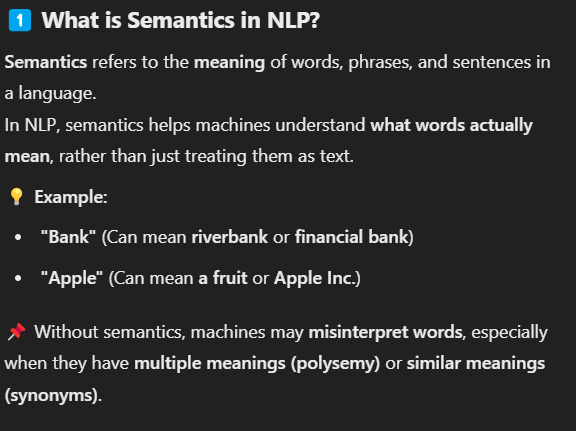

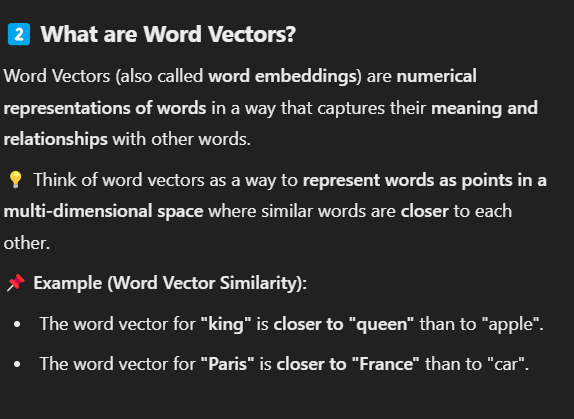

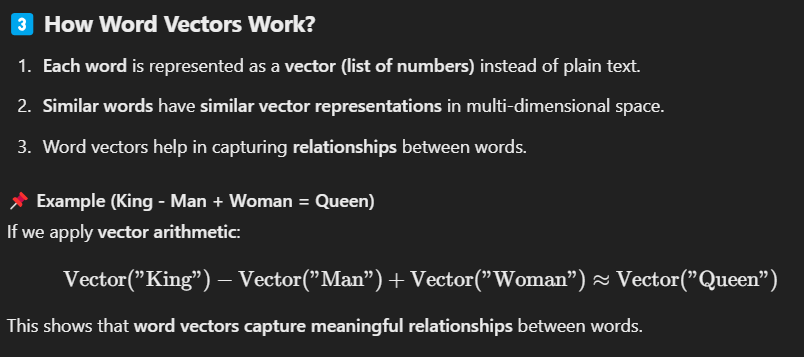

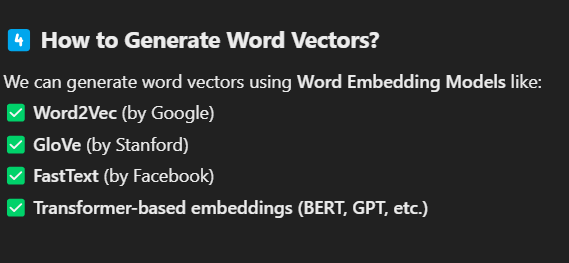

In [1]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Word2vec is a two-layer neural net that processes text.

input: text
output : set of vectors: feature vectors for words in that text.

the purpose and usefullness of word2vec is to group the vectors of similar word together in vectorspace.

word2vec creates vectors that are distributed numerical representations of words features, features such as the context of individual words.

we can use cosine similarity to measure how similar word vectors are to each other.




In [2]:
import spacy

In [3]:
nlp = spacy.load('en_core_web_md')

In [4]:
nlp('lion').vector

array([  1.2746  ,   0.46242 ,  -1.1829  ,  -5.2661  ,  -2.7128  ,
         1.8521  ,  -0.94273 ,   2.1865  ,   6.503   ,   0.6704  ,
         1.5361  ,   2.5992  ,  -0.36233 ,   4.3965  ,  -6.5644  ,
         1.6141  ,  -1.2897  ,   2.1184  ,  -0.63654 ,  -3.4572  ,
        -4.3771  ,   4.2074  ,  -3.6411  ,  -0.97214 ,   1.3253  ,
        -2.3125  ,  -3.6531  ,  -2.8398  ,   2.7913  ,  -1.53    ,
        -2.9984  ,  -2.6357  ,   0.50615 ,  -2.6925  ,   4.3401  ,
        -5.6017  ,   0.045691,   4.3832  ,  -0.19535 ,  -1.0751  ,
         0.32172 ,   2.4395  ,   4.6638  ,   3.4471  ,  -3.3847  ,
        -1.8238  ,   0.70212 ,   0.58557 ,   5.0032  ,  -3.1072  ,
         1.2364  ,   7.4595  ,   0.057368,   1.0111  ,  -1.0827  ,
         0.69113 ,   2.8009  ,  -3.4383  ,  -1.0599  ,  -2.2627  ,
        -5.149   ,  -5.0636  ,   3.1405  ,   1.0793  ,  -0.72892 ,
        -3.9939  ,  -0.69551 ,  -0.55767 ,   3.2555  ,  -2.9449  ,
         4.7114  ,   1.6388  ,   1.3828  ,   1.4255  ,  -3.233

In [5]:
doc = nlp(u'The quick brown fox jumped over the lazy dogs.')

doc.vector

array([-1.7769655 ,  0.39714497, -1.695121  , -0.1089559 ,  3.861494  ,
       -0.10778303, -0.02750097,  3.191314  ,  1.0857747 , -0.2615487 ,
        4.0720797 ,  1.5932049 , -2.7569218 ,  0.70982707,  2.0976841 ,
        0.08150103,  0.8847861 , -0.505237  ,  0.767067  , -2.88911   ,
       -0.28514975, -0.331664  ,  0.306348  , -2.25347   ,  0.96798134,
       -0.030282  , -3.765162  , -2.168157  ,  1.3985709 ,  2.175709  ,
       -0.81103534, -0.55156004, -1.033463  , -2.3130198 , -2.892054  ,
       -2.843568  , -0.33247897,  1.620013  ,  3.03307   , -0.42730814,
        1.298548  ,  0.18969259,  1.234282  , -0.14263602, -1.427765  ,
       -0.05807757,  0.33836406, -1.6987331 , -2.13661   ,  0.10412004,
        0.62479395,  3.9712129 , -0.31110606, -1.9676571 , -0.11860895,
        0.55582994, -0.660888  ,  1.947435  ,  1.6391805 ,  0.6569032 ,
        0.054408  , -2.08993   ,  1.0370519 ,  0.5363236 ,  0.00807395,
       -0.91060096, -3.3870788 , -1.4823462 ,  1.4170542 ,  0.32

**Identifying similar vectors**

The best way to expose vector relationships is through the `.similarity()` method of Doc tokens.

In [7]:
# Create a three-token Doc object:
tokens = nlp(u'lion cat pet')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

lion lion 1.0
lion cat 0.3854507803916931
lion pet 0.20031584799289703
cat lion 0.3854507803916931
cat cat 1.0
cat pet 0.732966423034668
pet lion 0.20031584799289703
pet cat 0.732966423034668
pet pet 1.0


In [8]:
tokens = nlp(u'dog cat nargle')

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 75.254234 False
cat True 63.188496 False
nargle False 0.0 True


In [9]:
from scipy import spatial

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

king = nlp.vocab['king'].vector
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector

# Now we find the closest vector in the vocabulary to the result of "man" - "woman" + "queen"
new_vector = king - man + woman
computed_similarities = []

for word in nlp.vocab:
    # Ignore words without vectors and mixed-case words:
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similarity = cosine_similarity(new_vector, word.vector)
                computed_similarities.append((word, similarity))

computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])

print([w[0].text for w in computed_similarities[:10]])

['king', 'the', 'and', 'that', 'havin', 'where', 'she', 'they', 'woman', 'somethin']


#**Sentiment Analysis**

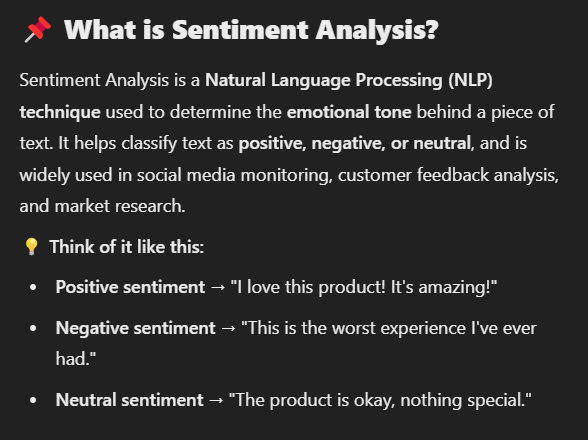

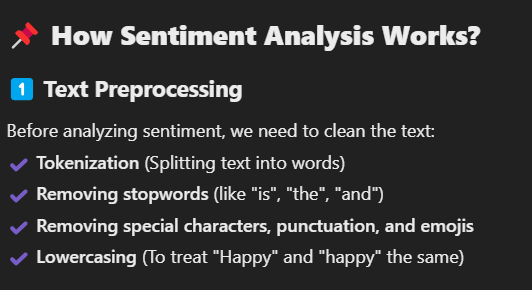

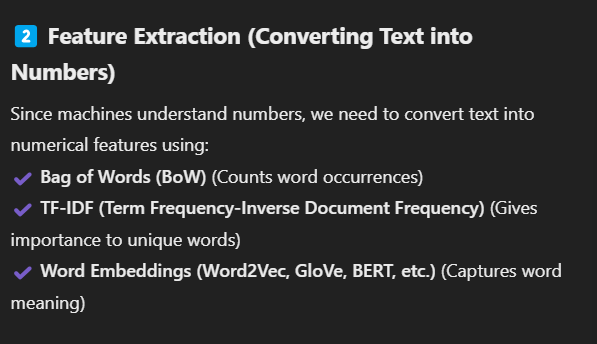

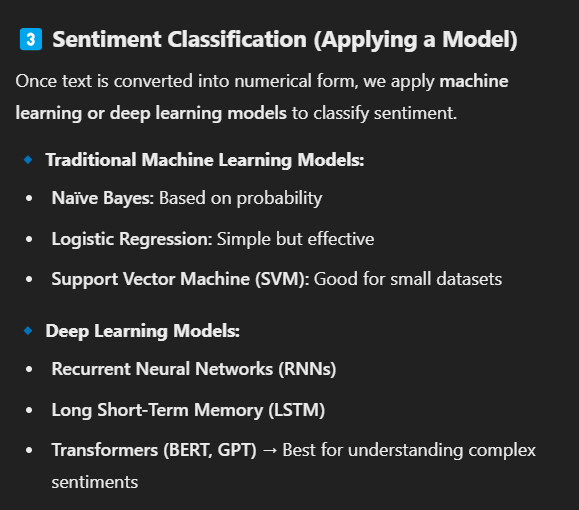

In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

VADER's `SentimentIntensityAnalyzer()` takes in a string and returns a dictionary of scores in each of four categories:
* negative
* neutral
* positive
* compound *(computed by normalizing the scores above)*

In [12]:
a = 'This was a good movie.'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [13]:
a = 'This was the best, most awesome movie EVER MADE!!!'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.8877}

In [14]:
a = 'This was the worst film to ever disgrace the screen.'
sid.polarity_scores(a)

{'neg': 0.477, 'neu': 0.523, 'pos': 0.0, 'compound': -0.8074}

In [16]:
import numpy as np
import pandas as pd

df = pd.read_csv('amazonreviews.tsv', sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [17]:
df['label'].value_counts()

,count
label,
neg,5097
pos,4903


In [18]:
# REMOVE NaN VALUES AND EMPTY STRINGS:
df.dropna(inplace=True)

blanks = []  # start with an empty list

for i,lb,rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

df.drop(blanks, inplace=True)

In [19]:
df['label'].value_counts()

,count
label,
neg,5097
pos,4903


In [20]:
sid.polarity_scores(df.loc[0]['review'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

In [21]:
df.loc[0]['label']

'pos'

In [22]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

df.head()

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


In [23]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()


,label,review,scores,compound
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


In [24]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

,label,review,scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [26]:
accuracy_score(df['label'],df['comp_score'])

0.7097

In [27]:
print(classification_report(df['label'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.86      0.52      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



In [28]:
print(confusion_matrix(df['label'],df['comp_score']))

[[2629 2468]
 [ 435 4468]]


1️⃣ Using TextBlob (Simple Method)

In [29]:
from textblob import TextBlob

# Example sentences
text1 = "I love this product! It's amazing."
text2 = "This is the worst experience I've ever had."
text3 = "The product is okay, nothing special."

# Sentiment analysis
print(TextBlob(text1).sentiment.polarity)  # Output: Positive (close to 1)
print(TextBlob(text2).sentiment.polarity)  # Output: Negative (close to -1)
print(TextBlob(text3).sentiment.polarity)  # Output: Neutral (close to 0)


0.6125
-1.0
0.4285714285714286


3️⃣ Using Machine Learning (TF-IDF + Naïve Bayes)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Sample data
X_train = ["I love this!", "Horrible experience", "It's okay", "Absolutely fantastic!", "Worst ever!"]
y_train = ["positive", "negative", "neutral", "positive", "negative"]

# Create a pipeline with TF-IDF and Naïve Bayes classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Predict sentiment
print(model.predict(["This phone is great!"]))  # Output: positive
print(model.predict(["I hate this product!"]))  # Output: negative


['positive']
['positive']
